In [1]:
import json
import os
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
from os import listdir

In [2]:
corpus_dir = "./annotated_corpus"

In [12]:
texts = listdir(corpus_dir)
texts = [t for t in texts if t.endswith('.txt')]

In [13]:
test_file = listdir(corpus_dir)[1]

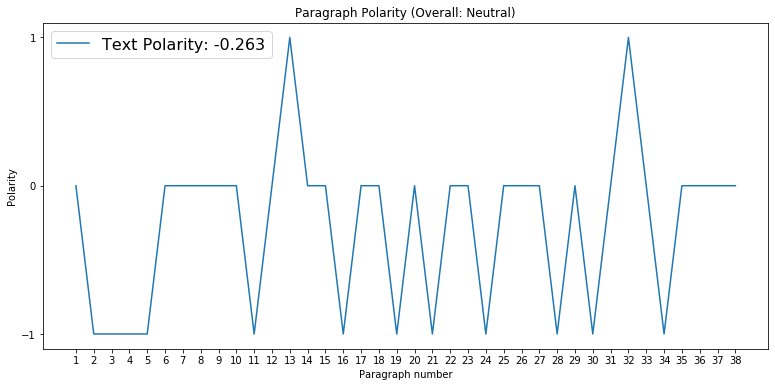

In [14]:
with open(corpus_dir+'/'+test_file) as f:
    paras = []
    polarities = []
    for line in f:
        line = line.split(" ")
        paras.append(line[0])
        polarities.append(line[-1])
    polarity = polarities[-1].split(':')[1]
    overall = '(Overall: '+ polarity+')'
    
    paras = [int(x) for x in paras[:-1]]
    polarities = [int(x[:-1]) for x in polarities[:-1]]
    
    avg = 'Text Polarity: '+str(round(sum(polarities)/len(paras),3))
    
    if polarity == 'Positive':
        color = 'tab:green'
    elif polarity == 'Neutral':
        color = 'tab:blue'
    else:
        color = 'tab:red'
    
    plt.figure(figsize=(13,6))
    plt.plot(paras, polarities, color, label = avg)
    plt.xlabel('Paragraph number')
    plt.ylabel('Polarity')
    plt.legend(fontsize=16)
    plt.title("Paragraph Polarity "+overall)
    if len(paras)>50:
        plt.xticks()
    else:
        plt.xticks(paras)
    plt.yticks([-1,0,1])
    plt.show()

In [15]:
###function to get the polarity graph, could be changed in backend for code compatibility
def get_polarity_graph(textfile):
    """
    Takes an annotated text file and generates a line graph that shows the sentiment polarity of each paragraph.
    The color of the line changes depending on the text polarity.
    """
    with open("annotated_corpus/"+textfile) as f:
            output = textfile.split(".")[0]+".jpg"
            paras = []
            polarities = []
            for line in f:
                line = line.split(" ")
                paras.append(line[0])
                polarities.append(line[-1])
            polarity = polarities[-1].split(':')[1]
            overall = '(Overall: '+ polarity+')'

            paras = [int(x) for x in paras[:-1]]
            polarities = [int(x[:-1]) for x in polarities[:-1]]

            avg = 'Text Polarity: '+str(round(sum(polarities)/len(paras),3))

            if polarity == 'Positive':
                color = 'tab:green'
            elif polarity == 'Neutral':
                color = 'tab:blue'
            else:
                color = 'tab:red'

            plt.figure(figsize=(13,6))
            plt.plot(paras, polarities, color, label = avg)
            plt.xlabel('Paragraph number')
            plt.ylabel('Polarity')
            plt.legend(fontsize=16)
            plt.title("Paragraph Polarity "+overall)
            if len(paras)>50:
                plt.xticks()
            else:
                plt.xticks(paras)
            plt.yticks([-1,0,1])
            
            plt.savefig(output, transparent=True)

In [16]:
pos_para = 0
neg_para = 0
neu_para = 0
pos_text = 0
neg_text = 0
neu_text = 0


for text in texts:
    with open(corpus_dir+'/'+text) as f:
        polarities = []
        for line in f:
            line = line.split(" ")
            polarities.append(line[-1])
            
        if polarities[-1].split(":")[1] == 'Positive':
            pos_text += 1
        elif polarities[-1].split(":")[1] == 'Negative':
            neg_text +=1
        else:
            neu_text +=1
            
        polarities = [int(x[:-1]) for x in polarities[:-1]]
        
        for polarity in polarities:
            if polarity == 1:
                pos_para += 1
            elif polarity == -1:
                neg_para +=1
            else:
                neu_para +=1

In [17]:
total_para = pos_para + neg_para + neu_para
total_text = pos_text + neg_text + neu_text

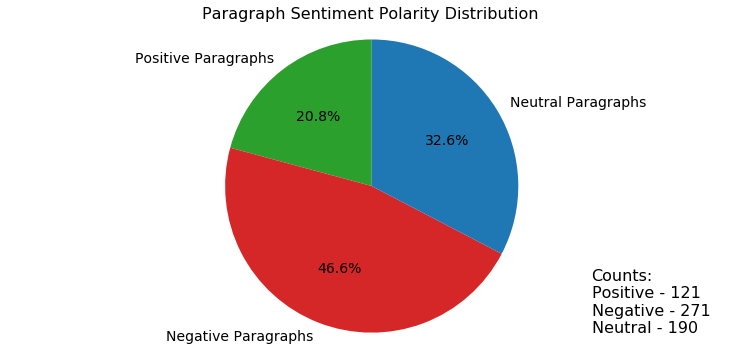

In [26]:
plt.figure(figsize=(13,6))
plt.pie(labels=['Positive Paragraphs','Negative Paragraphs','Neutral Paragraphs'],
                x=[pos_para,neg_para,neu_para],
                colors = ['tab:green','tab:red','tab:blue'],
                startangle=90,autopct='%1.1f%%',textprops={'fontsize': 14})
plt.title('Paragraph Sentiment Polarity Distribution',size=16)
plt.text(1.5,-1,'Counts:\nPositive - %d\nNegative - %d\nNeutral - %d'%(pos_para,neg_para,neu_para),size=16)
plt.axis('equal')
plt.savefig("images/paragraph_distribution.png", transparent=True)

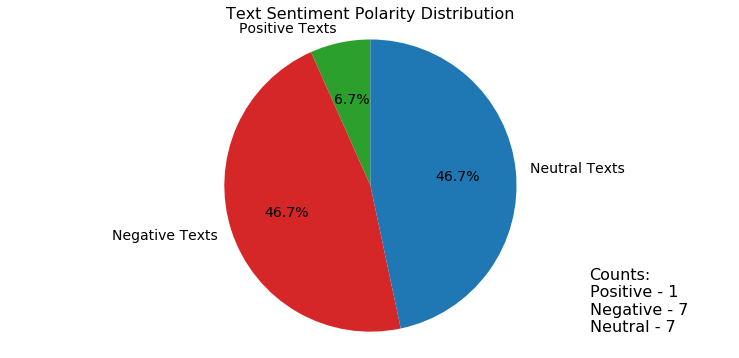

In [27]:
plt.figure(figsize=(13,6))
plt.pie(labels=['Positive Texts','Negative Texts','Neutral Texts'],
                x=[pos_text,neg_text,neu_text],
                colors = ['tab:green','tab:red','tab:blue'],
                startangle=90,autopct='%1.1f%%',textprops={'fontsize': 14})
plt.title('Text Sentiment Polarity Distribution',size=16)
plt.axis('equal')
plt.text(1.5,-1,'Counts:\nPositive - %d\nNegative - %d\nNeutral - %d'%(pos_text,neg_text,neu_text), size=16)
plt.savefig("images/text_distribution.png", transparent=True)

In [20]:
unannotated_corpus_dir = "./corpus"

In [21]:
full_corpus_list = listdir(unannotated_corpus_dir)

In [22]:
para_count = 0
for text in full_corpus_list:
    with open(unannotated_corpus_dir+'/'+text, 'rb') as f:
        for line in f:
            para_count +=1

In [23]:
print("Positive Texts:", pos_text)
print("Negative Texts:", neg_text)
print("Neutral Texts:", neu_text)
print("Annotated Texts:", total_text)
print("Positive Paragraphs:", pos_para)
print("Negative Paragraphs:", neg_para)
print("Neutral Paragraphs:", neu_para)
print("Annotated Paragraphs:", total_para)
print("Corpus Size:", len(full_corpus_list))
print("Paragraphs in Corpus:", para_count)

Positive Texts: 1
Negative Texts: 7
Neutral Texts: 7
Annotated Texts: 15
Positive Paragraphs: 121
Negative Paragraphs: 271
Neutral Paragraphs: 190
Annotated Paragraphs: 582
Corpus Size: 603
Paragraphs in Corpus: 17789
